In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

data = pd.read_csv('medical_cost_insurance.csv')

data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = data.drop('charges', axis=1)
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


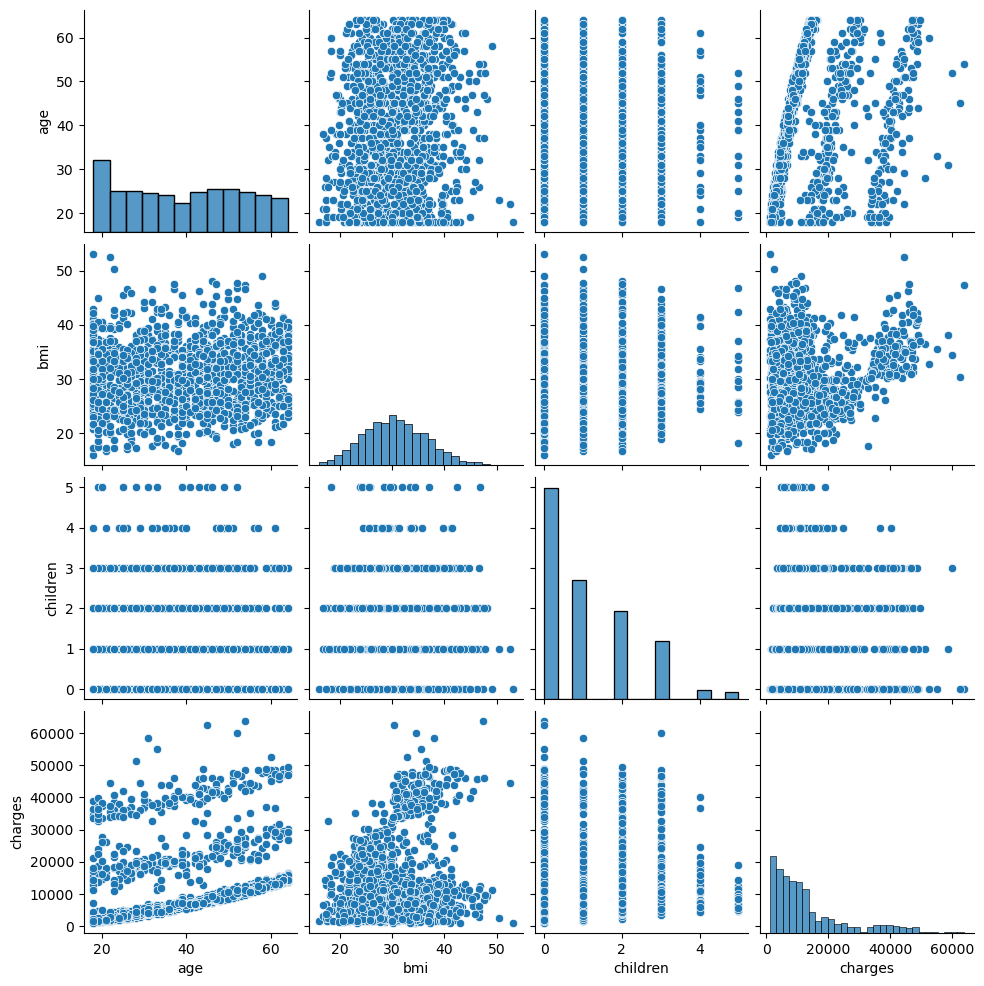

C:\Users\abhij\AppData\Local\Temp\ipykernel_19480\1144837628.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


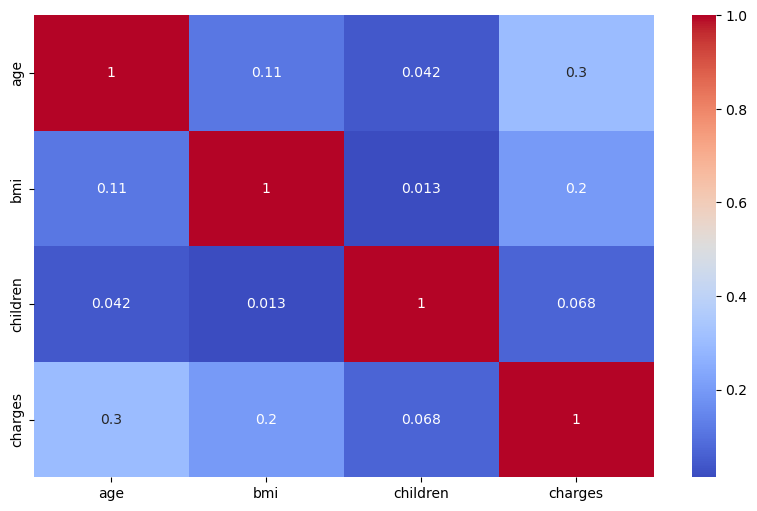

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data)
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print('Linear Regression')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_lr))
print('R-squared:', r2_score(y_test, y_pred_lr))

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print('\nRandom Forest Regressor')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_rf))
print('R-squared:', r2_score(y_test, y_pred_rf))

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print('\nGradient Boosting Regressor')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_gb))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_gb))
print('R-squared:', r2_score(y_test, y_pred_gb))


Linear Regression
Mean Absolute Error: 4173.344975929104
Mean Squared Error: 33551069.790909484
R-squared: 0.7838882838621627

Random Forest Regressor
Mean Absolute Error: 2541.614593844528
Mean Squared Error: 21003637.60876614
R-squared: 0.8647097634425496

Gradient Boosting Regressor
Mean Absolute Error: 2404.90176028892
Mean Squared Error: 18732863.283815846
R-squared: 0.8793364486536337


In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

y_pred_best_rf = best_rf_model.predict(X_test)

print('\nBest Random Forest Regressor')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_best_rf))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_best_rf))
print('R-squared:', r2_score(y_test, y_pred_best_rf))



Best Random Forest Regressor
Mean Absolute Error: 2540.0936779038707
Mean Squared Error: 20108115.99221026
R-squared: 0.8704780657529831


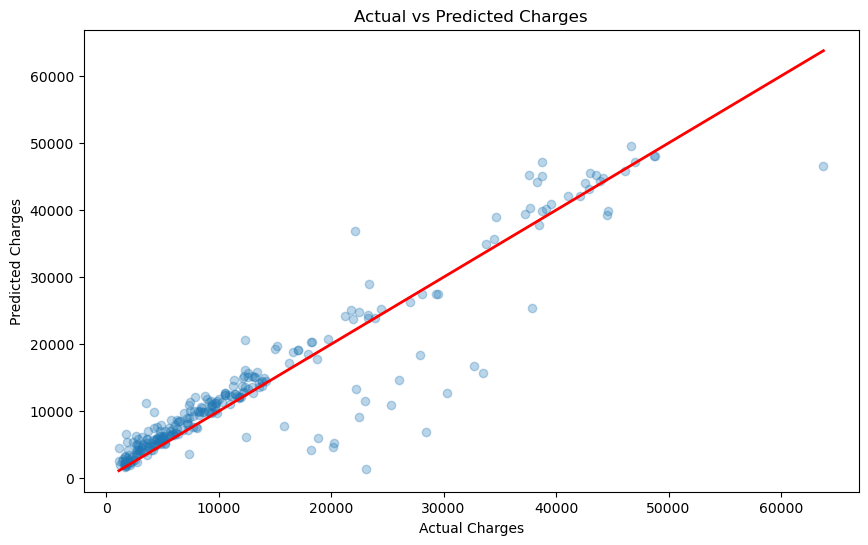

In [7]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()


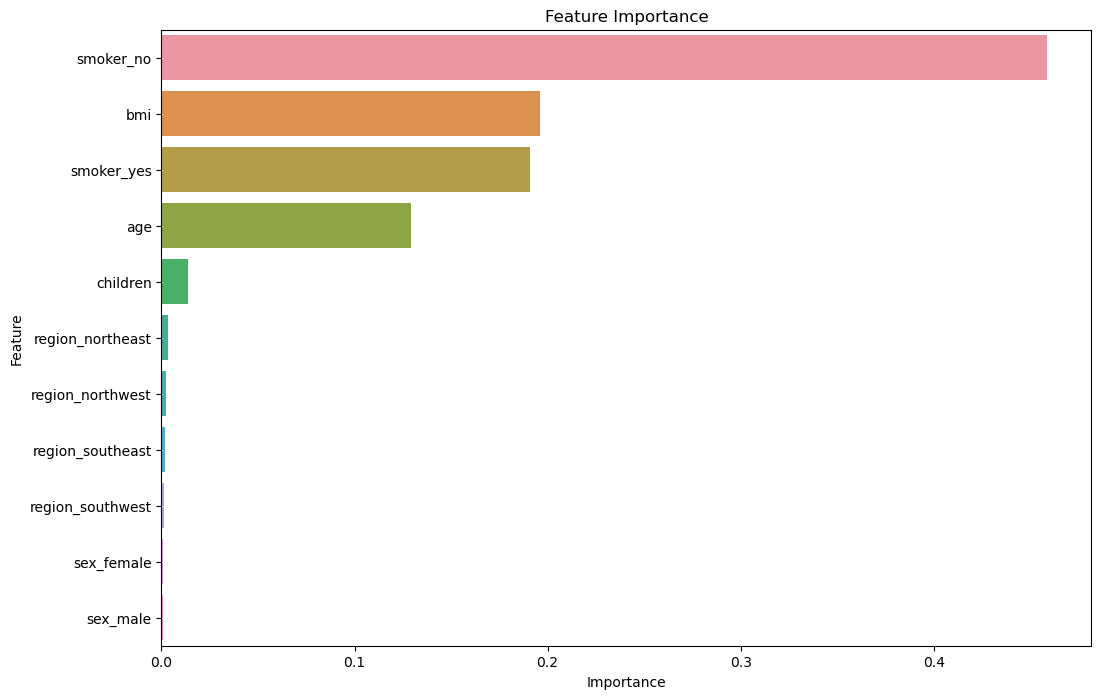

In [8]:
importances = best_rf_model.feature_importances_
features = numeric_features + list(preprocessor.transformers_[1][1].get_feature_names_out())
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


In [11]:
import joblib

joblib.dump(best_rf_model, 'best_rf_model.pkl')


['best_rf_model.pkl']

In [12]:

loaded_model = joblib.load('best_rf_model.pkl')

new_predictions = loaded_model.predict(X_test)


In [ ]:
#sol1

In [19]:
import pandas as pd

data = pd.read_csv('winequality-red.csv')

data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data['quality'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)

X = data.drop('quality', axis=1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Decision Tree Classifier
Accuracy: 0.871875
ROC AUC: 0.7223521159691373
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       273
           1       0.57      0.51      0.54        47

    accuracy                           0.87       320
   macro avg       0.74      0.72      0.73       320
weighted avg       0.87      0.87      0.87       320



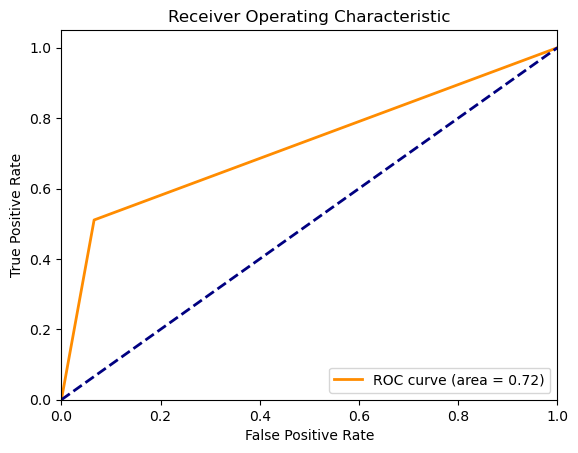

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report
import matplotlib.pyplot as plt

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]
print('Decision Tree Classifier')
print('Accuracy:', accuracy_score(y_test, y_pred_dt))
print('ROC AUC:', roc_auc_score(y_test, y_prob_dt))
print(classification_report(y_test, y_pred_dt))

fpr, tpr, _ = roc_curve(y_test, y_prob_dt)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob_dt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



Best Decision Tree Classifier
Accuracy: 0.859375
ROC AUC: 0.8644688644688645
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       273
           1       0.55      0.23      0.33        47

    accuracy                           0.86       320
   macro avg       0.72      0.60      0.62       320
weighted avg       0.83      0.86      0.83       320



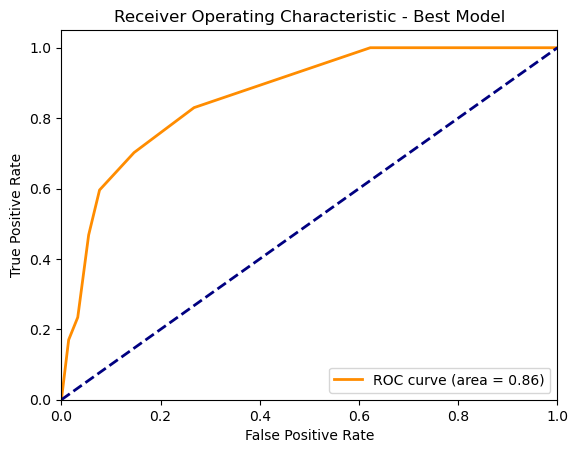

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_dt_model = grid_search.best_estimator_

y_pred_best_dt = best_dt_model.predict(X_test)
y_prob_best_dt = best_dt_model.predict_proba(X_test)[:, 1]
print('\nBest Decision Tree Classifier')
print('Accuracy:', accuracy_score(y_test, y_pred_best_dt))
print('ROC AUC:', roc_auc_score(y_test, y_prob_best_dt))
print(classification_report(y_test, y_pred_best_dt))

fpr, tpr, _ = roc_curve(y_test, y_prob_best_dt)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob_best_dt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Best Model')
plt.legend(loc="lower right")
plt.show()



Decision Tree Classifier with Selected Features
Accuracy: 0.871875
ROC AUC: 0.7487725040916531
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       273
           1       0.56      0.57      0.57        47

    accuracy                           0.87       320
   macro avg       0.74      0.75      0.75       320
weighted avg       0.87      0.87      0.87       320



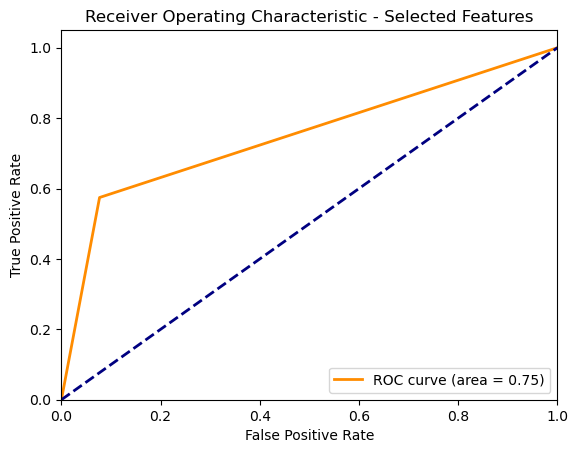

In [23]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(best_dt_model, prefit=True)
X_selected_train = selector.transform(X_train)
X_selected_test = selector.transform(X_test)

dt_selected = DecisionTreeClassifier(random_state=42)
dt_selected.fit(X_selected_train, y_train)

y_pred_selected = dt_selected.predict(X_selected_test)
y_prob_selected = dt_selected.predict_proba(X_selected_test)[:, 1]
print('\nDecision Tree Classifier with Selected Features')
print('Accuracy:', accuracy_score(y_test, y_pred_selected))
print('ROC AUC:', roc_auc_score(y_test, y_prob_selected))
print(classification_report(y_test, y_pred_selected))

fpr, tpr, _ = roc_curve(y_test, y_prob_selected)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob_selected))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Selected Features')
plt.legend(loc="lower right")
plt.show()


In [24]:
joblib.dump(best_dt_model, 'best_dt_model.pkl')


['best_dt_model.pkl']

In [25]:
loaded_model = joblib.load('best_dt_model.pkl')

new_predictions = loaded_model.predict(X_test)


In [26]:
new_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,